<h1> Trends in Technological Advancements </h1>

Academic papers, patents and trademarks are often a very good indication of the direction in which a field of research is evolving. In this project, we aim to procure and analyze millions of patents, published academic work and trademarks. The procured documents must range over a wide period of time (30+ years) and over diverse fields in order give us a sense of how academic research has evolved over time and how inter and cross disciplinary research has grown.

**Dataset:**
- The US Patent and Trademark Office has made all its patent and trademark information freely available for public use. The database consists of 9.4 million records from 1981 to present.
- Utilizing public databases of published academic work (such as Google Scholar) to obtain relevant material.

**Project Objectives:**
- Identify key trends in the development of specific fields of research (eg. Advances in Deep Learning).
- Geographical analysis of research output and understanding why different parts of the world are focussed on different fields.
- Performing a time analysis on the data to determine the “right time” to publish (great work published too early or too late into the growth of a field are not taken well).

In [65]:
%matplotlib inline
import scipy.sparse as sp
import numpy as np 
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import collections
stop_list=stopwords.words('english')
from tfidf_and_cosine import tfidf
from tfidf_and_cosine import cosine_similarity
import operator
import pickle
###AFTER MID TERM REPORT ADDITIONS###########
#PRANEET ADDED FUNCTIONS START###############
import pdngram
from pdngram import LanguageModel
import ExtractArchive1
from ExtractArchive1 import extractp
########PRANEET ADDED FUNCTIONS OVER##########



<h2>Data Collection</h2>

### Google Scholar

Google scholar is a publicly available and freely accesible search engine for scholarly literature. Here we try to obtain publication data from Google Scholar by developing a querier and parser for Google Scholar output. Although there are open source parsers [[1]](https://github.com/ckreibich/scholar.py) that do this, it is easier to write a customized parser that parses the information we need. It's classes can be invoked independently or used as a command line tool. Currently the parser implements the full functionality of Scholar's *Advanced Search* option and recursively retrieves the titles of the search outputs. Since Google does not provide the complete abstract in its output, there is no way simple way to parse the complete abstract for all results. The following code run from the command line parses the first 1000 results for a particular query and dumps them into a .pkl file.

In [5]:
!./scholared.py -A "deep learning" --after 2005 --before 2010

/bin/sh: ./scholared.py: Permission denied


The above line of code executed by the shell, parses all results for the search phrase "deep learning" published between the dates 2005 and 2010 and dumps them into a pkl file. This allows us to use this data later for further analysis.

<h3>From USPTO Bulk data</h3>

The US Patent and Trademark Office has made all its patent and trademark information freely available for public use. This data can be found <a href='https://pairbulkdata.uspto.gov/'>here</a>. The database consists of 9.4 million records from 1981 to present. This data is available in XML and JSON formats out of which, we chose to work with data in JSON format owing to ease of working with JSON structures. Currently, we are extracting the titles of each of the patent out of the year wise bulk data of patents. Following code extracts titles of patents from json data of patents information. Since the extraction of titles from huge json files is very time consuming, we are dumping the list of titles into pickle files so as to be able to load the data whenever required.

In [6]:
import sys
sys.path.insert(0, 'DataCollection/')

from DataCollection import dataCollection, loadPickle

# Extract titles of all patents of the 2016 year
# Takes 2016.json and dumps into 2016.pkl
dataCollection('DataCollection/2016.json')

ImportError: No module named ijson

Let us load the pickle file generated above into a list.

In [3]:
titlesList = loadPickle('DataCollection/2016.pkl')
print titlesList[0:25] # Printing first 25 titles

[u'ROSACEA TREATMENTS AND KITS FOR PERFORMING THEM', u'MINI-OPTICAL NETWORK TERMINAL (ONT)', u'CHARGE EQUALIZATION SYSTEM FOR BATTERIES', u'ELECTROMECHANICAL TRANSDUCER COMPRISING A POLYURETHANE POLYMER WITH POLYESTER AND/OR POLYCARBONATE UNITS', u'High-Pressure Side Separation of Liquid Lubricant for Lubricating Volumetrically Working Expansion Machines', u'SUBCUTANEOUS INSERTER DEVICE', u'Pesticide Compositions Containing Thyme Oil and Cinnamon Oil', u'Nanostructured Mn-Al Permanent Magnets And Method of Producing Same', u'METHOD OF MANUFACTURING ALUMINA-BASED MILLING MEDIUM', u'PEPTIDES FOR USE IN THE TREATMENT OF IL-1 RELATED DISEASES AND CONDITIONS', u'Light with a film for altering the radiation characteristics', u'SOLE MEMBER OF FOOTWEAR', u'TAPELINE AND BLOCKING MEMBER FOR TAPELINE END', u'STEAM IRON', u'PNEUMATIC TIRE', u'Solder Ball Supplying Method, Solder Ball Supplying Device, and Solder Bump Forming Method', u'INFORMATION PROCESSING DEVICE, INFORMATION PROCESSING METHOD, 

<h3> TFIDF MATRIX </h3>

Once,the Titles Have been collected,we aim to make some sense of it.We import the Data from the Pickle File which is stored in our Local Directory.We import the NLTK Stop Work List and remove Blank Spaces as well from each of The Titles.After this,it is fed into our TFIDF Matrix which resturns the Sparse Matrix,Dictionary of Word Count,and the List of Unique words which are present in all of the Patent Titles.

In [ ]:
number_of_docs=5000
x=testp[1:number_of_docs]

x=[xx.encode('UTF8') for xx in x]
#####STOP WORD REMOVAL START########################
test_1=[]
for sentence in x:
    sentence=sentence.lower()
    text = ' '.join([word for word in sentence.split() if word not in (stopwords.words('english'))])
    test_1.append(text)
    
##############STOP WORD REMOVAL COMPLETE############################
sparse_mat,word_list,dict_words=tfidf(x)
            
print sparse_mat.todense()
print word_list
print dict_words

Here,we have printed the Given Sparse Matrix,List of Unique Words and The Dicitonary Entries correspondeding to each UNique Word and its count in all of the Documents.

In [80]:
import gzip, glob, re
from sklearn.feature_extraction import text
import collections
import string

files = glob.glob('data/cs/*.txt.gz')
year_wise_files = {}
for filename in files:
    match = re.search(r'(\d+)-\d+-\d+.txt.gz', filename)
    year = match.groups(0)[0]
    if year not in year_wise_files:
        year_wise_files[year] = []
    year_wise_files[year].append(filename)
#print year_wise_files

ignore_words = stopwords.words('english') + list(set(string.punctuation))

year_wise_records = {}
for year in year_wise_files:
    for filename in year_wise_files[year]:
        if year not in year_wise_records:
            year_wise_records[year] = ""
        with gzip.open(filename, 'rb') as f:
            #word_list = [word for word in f.read().split('\t')[3].split() if word not in ignore_words]
            #year_wise_records[year] += ' '.join(word_list)
            year_wise_records[year] += f.read().split('\t')[3]

year_wise_records = collections.OrderedDict(sorted(year_wise_records.items()))

#print year_wise_records
records_list = []
years_list = []
#print type(year_wise_records)
for year, record in year_wise_records.iteritems():
    records_list.append(record)
    years_list.append(year)

tfidf = text.TfidfVectorizer(analyzer='word', ngram_range=(1,3), stop_words='english')
abstractTfidf = tfidf.fit_transform(records_list)
abstract_features = tfidf.get_feature_names()
abstract_features_sum = abstractTfidf.sum(axis=0)


#print abstract_features_sum.tolist()
sum_word_tfidfs = zip(abstract_features, abstract_features_sum.tolist()[0])
sum_word_tfidfs.sort(key=lambda x: x[1], reverse=True)

#print sum_word_tfidfs[:100]
one_word = []
two_words = []
three_words = []
for e0, e1 in sum_word_tfidfs:
    if len(e0.split()) == 1:
        one_word.append((e0, e1))
    if len(e0.split()) == 2:
        two_words.append((e0, e1))
    if len(e0.split()) == 3:
        three_words.append((e0, e1))

print "----- One word -----"
print one_word[:30]
print "----- Two words -----"
print two_words[:30]
print "----- Three words -----"
print three_words[:30]

num_years = abstractTfidf.shape[0]
top_n = 5

'''
for yr_idx in xrange(0, num_years):
    feature_index = abstractTfidf[yr_idx, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [abstractTfidf[yr_idx, x] for x in feature_index])

    one_word = []
    two_words = []
    three_words = []
    for word, score in [(abstract_features[i] , score) for (i, score) in tfidf_scores]:
        if len(word.split()) == 1:
            one_word.append((word, score))
        if len(word.split()) == 2:
            two_words.append((word, score))
        if len(word.split()) == 3:
            three_words.append((word, score))

    one_word.sort(key=lambda x: x[1], reverse=True)
    two_words.sort(key=lambda x: x[1], reverse=True)
    three_words.sort(key=lambda x: x[1], reverse=True)
    #print one_word[:top_n]
    #print two_words[:top_n]
    #print three_words[:top_n]
'''



----- One word -----
[(u'paper', 2.978737761677116), (u'based', 2.5121780208212985), (u'algorithm', 2.4394494024551396), (u'problem', 2.2873174347817455), (u'data', 2.26753522803137), (u'model', 2.014561435404223), (u'time', 1.9867995918767605), (u'cs', 1.9607344370047826), (u'results', 1.7519832822027868), (u'information', 1.6944316803237511), (u'network', 1.6644619459963654), (u'using', 1.645451688989748), (u'number', 1.5164314588744792), (u'new', 1.5134839986028206), (u'systems', 1.340110080280939), (u'used', 1.2973601612399006), (u'algorithms', 1.2763462302941597), (u'proposed', 1.2693766464787513), (u'performance', 1.2648365125930299), (u'approach', 1.2440198759547239), (u'method', 1.2119721826963725), (u'set', 1.200307261043557), (u'problems', 1.1395622150551301), (u'present', 1.126216171090445), (u'different', 1.0441465240986072), (u'networks', 1.0383883931543285), (u'learning', 1.030781968091577), (u'use', 1.0294786654723342), (u'channel', 1.0141431264608813), (u'complexity', 0

'\nfor yr_idx in xrange(0, num_years):\n    feature_index = abstractTfidf[yr_idx, :].nonzero()[1]\n    tfidf_scores = zip(feature_index, [abstractTfidf[yr_idx, x] for x in feature_index])\n\n    one_word = []\n    two_words = []\n    three_words = []\n    for word, score in [(abstract_features[i] , score) for (i, score) in tfidf_scores]:\n        if len(word.split()) == 1:\n            one_word.append((word, score))\n        if len(word.split()) == 2:\n            two_words.append((word, score))\n        if len(word.split()) == 3:\n            three_words.append((word, score))\n\n    one_word.sort(key=lambda x: x[1], reverse=True)\n    two_words.sort(key=lambda x: x[1], reverse=True)\n    three_words.sort(key=lambda x: x[1], reverse=True)\n    #print one_word[:top_n]\n    #print two_words[:top_n]\n    #print three_words[:top_n]\n'

In [96]:
print records_list

['A special case of the satisfiability problem , in which the clauses have a hierarchical structure , is shown to be solvable in linear time , assuming that the clauses have been represented in a convenient way .\n', 'We study the configurations of pixels that occur when two digitized straight lines meet each other .\n', "We discuss properties of recursive schemas related to McCarthy 's `` 91 function '' and to Takeuchi 's triple recursion . Several theorems are proposed as interesting candidates for machine verification , and some intriguing open questions are raised .\nThe author argues to Silicon Valley that the most important and powerful part of computer science is work that is simultaneously theoretical and practical . He particularly considers the intersection of the theory of algorithms and practical software development . He combines examples from the development of the TeX typesetting system with clever jokes , criticisms , and encouragements .\nThis article is a sketch of id

In [99]:
for year, record in year_wise_records.iteritems():
    print year, " : ", record.count('deep learning')

1989  :  0
1990  :  0
1991  :  0
1992  :  0
1993  :  0
1994  :  0
1995  :  0
1996  :  0
1997  :  0
1998  :  0
1999  :  0
2000  :  0
2001  :  0
2002  :  0
2003  :  0
2004  :  0
2005  :  0
2006  :  0
2007  :  0
2008  :  0
2009  :  0
2010  :  2
2011  :  1
2012  :  0
2013  :  0
2014  :  2
2015  :  9
2016  :  22


In [91]:
from collections import Counter

#print Counter([word for word in year_wise_records['1989'].split()])


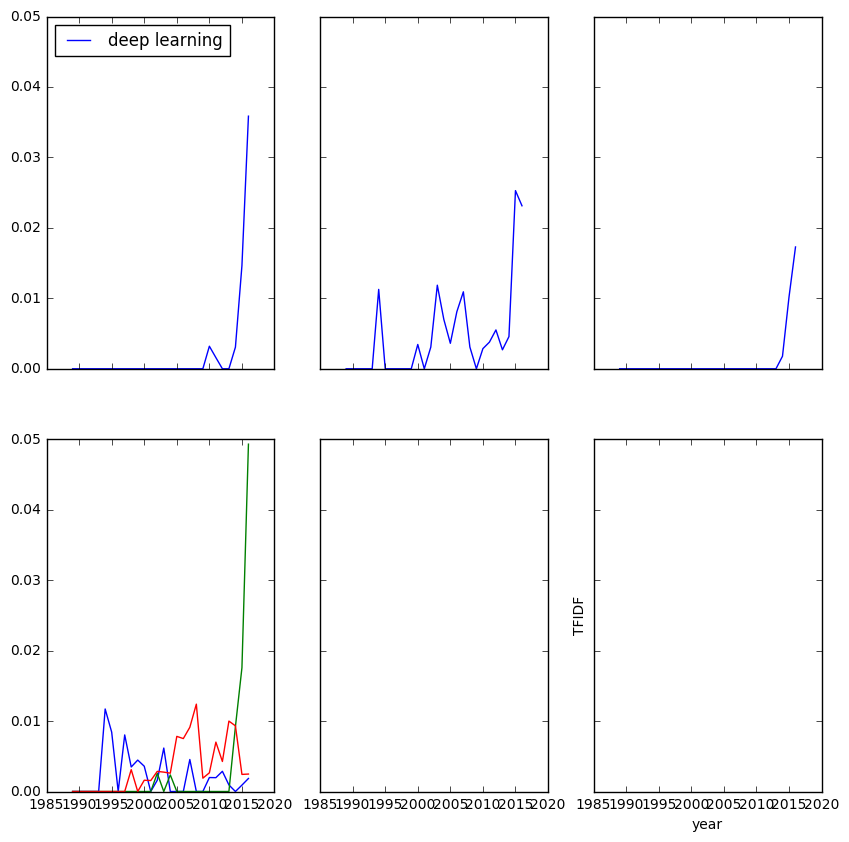

In [143]:
import matplotlib.pyplot as plt

fields = ['deep learning', 'neural networks', 'convolutional neural network', 'artificial intelligence', 'cnn', 'statistics']
field_idxs = [abstract_features.index(field) for field in fields]

y_arr = [abstractTfidf.getcol(field_idx).todense().tolist() for field_idx in field_idxs]
x = years_list


fig, ((ax0,ax1,ax2), (ax3, ax4, ax5)) = plt.subplots(2,3, sharex=True, sharey=True, figsize=(10,10))
#for idx in xrange(0, len(y_arr)):
#    ax[idx].plot(x, y_arr[idx], label=fields[idx])
ax0.plot(x, y_arr[0], label=fields[0])
ax1.plot(x, y_arr[1], label=fields[1])
ax2.plot(x, y_arr[2], label=fields[2])
ax3.plot(x, y_arr[3], label=fields[3])
ax3.plot(x, y_arr[4], label=fields[4])
ax3.plot(x, y_arr[5], label=fields[5])
ax0.legend(loc='upper left')

#plt.legend(loc='upper left')
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, fields)
plt.ylabel('TFIDF')
plt.xlabel('year')

plt.show()

In [83]:
print len(abstract_features)
for phrase in abstract_features:
    if 'deep learning' in phrase:
        print phrase

808843
02874for deep learning
10010deep learning
10010deep learning based
1611 10010deep learning
accuracy deep learning
application deep learning
art deep learning
based deep learning
benchmark deep learning
best deep learning
classification deep learning
combination deep learning
conditioning deep learning
deep learning
deep learning algorithms
deep learning applications
deep learning approach
deep learning approaches
deep learning architecture
deep learning based
deep learning benchmarks
deep learning classification
deep learning community
deep learning datasets
deep learning emerging
deep learning grow
deep learning learn
deep learning methods
deep learning models
deep learning network
deep learning networks
deep learning neural
deep learning power
deep learning research
deep learning settings
deep learning shows
deep learning target
deep learning techniques
deep learning terms
deep learning tool
deep learning tools
development deep learning
emergence deep learning
end deep learnin

<h3> Analysis on Data </h3>

[('AMINO-ALCOHOL', 8281), ('Situ', 8280), ('Bacteria', 8279), ('Site', 8278), ('SELF', 8277), ('INCREASED', 8276), ('Surface-modified', 8275), ('OXAZOLE', 8274), ('LOCAL', 8273), ('VALUABLE', 8272), ('INSECT', 8271), ('GEARED', 8270), ('SPACE', 8269), ('BALLS', 8268), ('Procedures', 8267)]
Document which is Most Similar to all is SYSTEM AND METHOD FOR LASER LYSIS


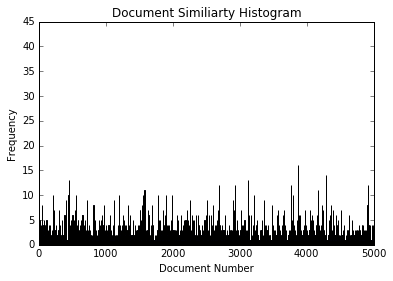

In [16]:
thres=15
#print dict_words
#top=sorted(dict_words, key=c.__getitem__)
top = sorted(dict_words.items(), key=operator.itemgetter(1))
#print top
top_n=top[len(top)-thres:]
top_n=top_n[::-1]
print top_n 

###########GETTING MOST SIMILAR DOCUMENTS############
doc_sim=cosine_similarity(sparse_mat)  
#print doc_sim
M,N=(doc_sim).shape
#print M,N
a = np.ones((M, M), int)
np.fill_diagonal(a, 0)
#print a
Cosine_List=np.multiply(doc_sim,a)
#print Cosine_List
Highest_Sim=np.argmax(Cosine_List,axis=1)
High=np.argmax(Highest_Sim)
#print High
print "Document which is Most Similar to all is:",testp[High]
plt.hist(Highest_Sim,M)
plt.title("Document Similiarty Histogram")
plt.xlabel("Document Number")
plt.ylabel("Frequency")

###############PLOTTING THEM#####################



We attempt to Clean the Derive Similiarties Among Documents using the Cosine Similiairty Function,and see which documents  are the most co-rellated with each other.By setting the Diagonal Eleemnts to Zero,can easily extract the individual document which is most similar to the current one.We proceed to list all of these docuemnts and the Histogram is plotted above .For our given analysis,based on Document Title,the most similar one is "System and Method for Laser Lysis"

<h2>N_GRAM ON DATA SET</h2>

Here,we proceed with Developing an N-Gram Model for Text extracted from the Archive Data set.Since the Data set is vast and consists of 680MB worth of Files.We do this Topic Wise By  extracting data from certain Sub-Categories such as "Computer Science","Physics","Mathematics".We start by loading our Data from the Files.We call the Python Script pdngram whic calls our "Language Model" class.It builds our Dicitonary of n-grams and its count and returns the n-gram of a Specified Length.Before this we have to preprocess our data to put in the Format as required by the Class. <b>Code taken from: NLP notebook sample solution</b>

In [7]:
"""
Here,we Intialiaze by defining the relative paths to the folders containing the Research publications sorted by date.
For our Demonstration,We have Selected the Publications relevant to Physics,Computer Science,Mathematics and 
NOTE:THESE SCRIPTS RUN ON THE "DATA" FOlder which has not been submitted with this attachment.A Link to this Folder has
been attached above.Download the Folder,and store it in this Directory before rerunning this File.
"""
path1='./data /physics'
path2='./data /cs'
path3='./data /math'
path4='./data /stat'

listp=extractp(path1)    
print "\nN-Gram for Physics Research Paper Publications:"
our_ngram=LanguageModel(listp[:800],3)
print our_ngram.sample(200)
listp=extractp(path2)    
print "\nN-Gram for Computer Science Research Publications:"
our_ngram=LanguageModel(listp[:800],3)
print our_ngram.sample(200)
listp=extractp(path3)    
print "\nN-Gram for Mathematics Research Publications:"
our_ngram=LanguageModel(listp[:800],3)
print our_ngram.sample(200)
listp=extractp(path4)    
print "\nN-Gram for Statistics Research Publications:"
our_ngram=LanguageModel(listp[:800],3)
print our_ngram.sample(200)


N-Gram for Physics Research Paper Publications:
described . Energy values for the random phase approximation ( LDA ) , as can be related in a channel . The scaling exponents are indistinguishable from each other . A single narrow self-focused current jet of energetic electrons is used as atomic optical frequency standards which admits to introduce the notion of self potential is essential for tasks with , or when estimates of wire fixation and elimination of transverse components of high order mesh refinement multigrid computations is comparable to the usual sense but rather to insufficiencies in the sense of polarization dynamics in a storage ring with parameters such that b=Lx+e where e is a stable mode excited by a case of strongly overlapping RBS peaks a depth profile reconstruction without noise fitting has been used to calculate the time-dependent spectra of tetrahedral molecules The time-dependent local-density approximation ( TDLDA ) is examined by actual Monte Carlo simulatio